# Reference
* GitHub : https://github.com/facebook/prophet
* Document : https://facebook.github.io/prophet/ & https://vectorf.github.io/2017/03/12/20170312-Prophet%E4%B9%8B%E4%BD%BF%E7%94%A8%E7%AF%87%EF%BC%88%E4%B8%80%EF%BC%89/

# Installation

In [ ]:
! pip install pystan 
! pip install fbprophet

## for Anaconda
! conda install gcc
! conda install -c conda-forge fbprophet

# Quick Start

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from fbprophet import Prophet

### import the data
* Prophet 使用的資料集，一定要包含兩個欄位 ds 和 y (需使用指定的欄位名稱)
* ds : 為日期或明確的時間點
* y  : 為數值變數 (要預測的欄位)

In [2]:
df = pd.read_csv("data/cti.csv")
df.dtypes

ds    object
y      int64
dtype: object

In [3]:
df["ds"] = df["ds"].astype("datetime64[D]")
df.head()

,ds,y
0,2017-01-01,6509
1,2017-01-02,9793
2,2017-01-03,29520
3,2017-01-04,30650
4,2017-01-05,28251


### plot time series data

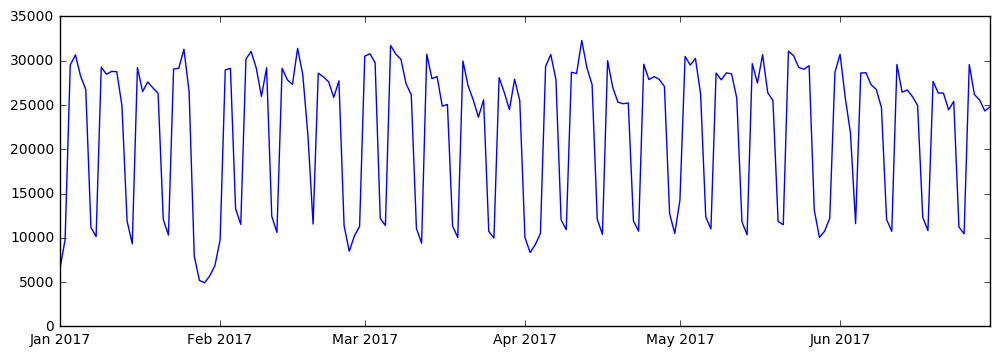

In [4]:
plt.subplots(figsize = (12, 4))
plt.plot(df["ds"], df["y"])
plt.show()

### fit the model

In [5]:
model_o = Prophet()
model_o.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### prediction
* make_future_dataframe : 指定要預測的天數或時間點

In [6]:
# periods = 30 : 會產生 training data 既有的日期和未來 30 天的日期
future_o = model_o.make_future_dataframe(periods = 30)
predict_o = model_o.predict(future_o)
predict_o.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2017-01-01,21244.942089,21244.942089,21244.942089,3325.391902,15487.801586,-11907.799133,-11907.799133,-11907.799133,-11907.799133,-11907.799133,-11907.799133,-11907.799133,-11907.799133,-11907.799133,9337.142956
1,2017-01-02,21253.164030,21253.164030,21253.164030,18125.797569,30490.301001,2984.995131,2984.995131,2984.995131,2984.995131,2984.995131,2984.995131,2984.995131,2984.995131,2984.995131,24238.159161
2,2017-01-03,21261.385971,21261.385971,21261.385971,18622.757106,30554.816222,3448.470842,3448.470842,3448.470842,3448.470842,3448.470842,3448.470842,3448.470842,3448.470842,3448.470842,24709.856813
3,2017-01-04,21269.607912,21269.607912,21269.607912,20556.804297,32865.983236,5657.981416,5657.981416,5657.981416,5657.981416,5657.981416,5657.981416,5657.981416,5657.981416,5657.981416,26927.589328
4,2017-01-05,21277.829853,21277.829853,21277.829853,20484.287714,33067.516492,5555.448544,5555.448544,5555.448544,5555.448544,5555.448544,5555.448544,5555.448544,5555.448544,5555.448544,26833.278397


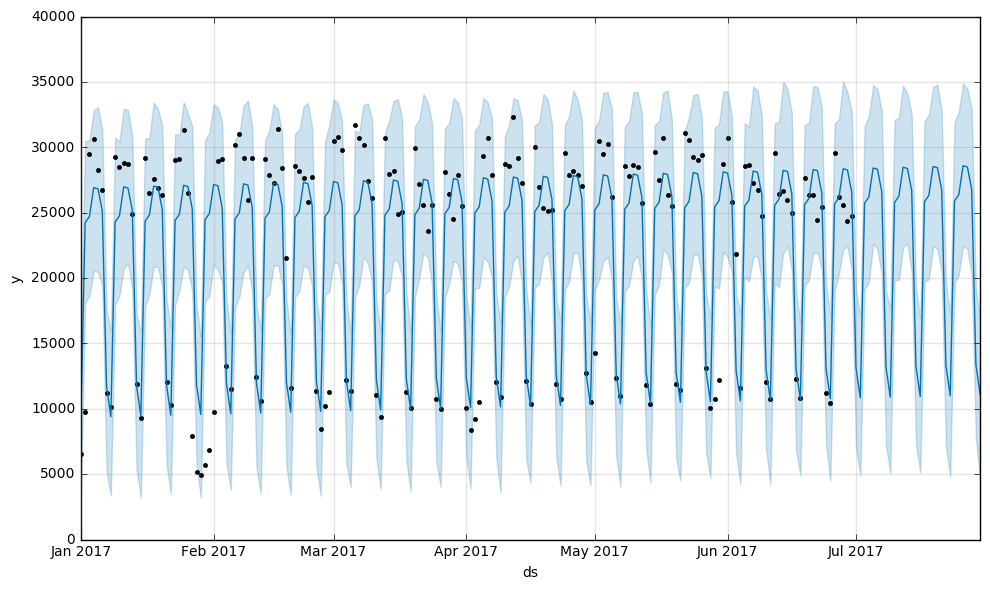

In [7]:
model_o.plot(predict_o)

# Trend Changepoints

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


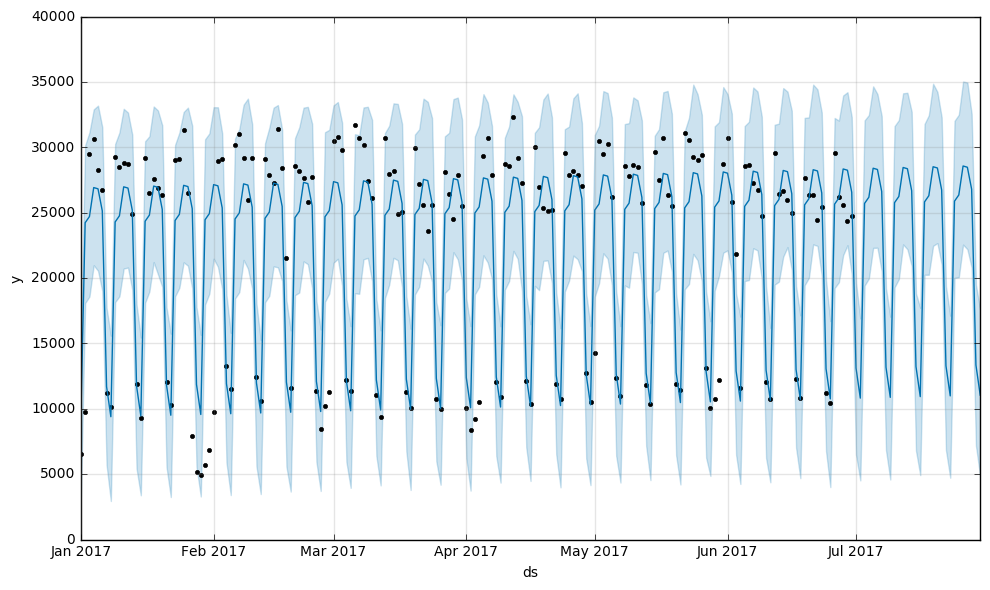

In [8]:
# 補上班日
model_t = Prophet(changepoints = ["2017-02-18", "2017-06-03"])
model_t.fit(df)
future_t = model_t.make_future_dataframe(periods = 30)
predict_t = model_t.predict(future_t)
model_t.plot(predict_t)

# Holiday Effects
* 需新建一個 Data Frame，一定要包含兩個欄位 holiday 和 ds (需使用指定的欄位名稱)
* holiday : 節日或假日的說明
* ds : 為日期或明確的時間點

In [9]:
holidays = pd.DataFrame({
        "holiday": "holiday",
        "ds": pd.to_datetime(["2017-01-02", "2017-01-27", "2017-01-30", "2017-01-31", "2017-02-01",
                              "2017-02-27", "2017-02-28", "2017-04-03", "2017-04-04", "2017-05-01",
                              "2017-05-29", "2017-05-30"])
    })

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


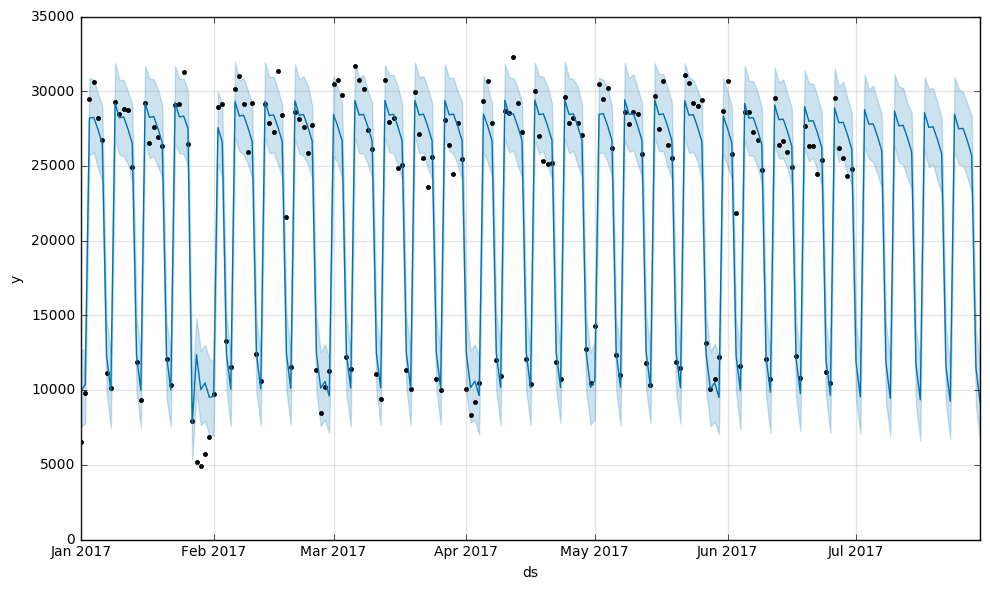

In [10]:
model_h = Prophet(holidays = holidays)
model_h.fit(df)
future_h = model_h.make_future_dataframe(periods = 30)
predict_h = model_h.predict(future_h)
model_h.plot(predict_h)

# Outliers & Missing Value

In [11]:
## 假設 2017-05-01 ~ 2017-05-15 有缺漏
df_m = df
df_m.loc[(df_m["ds"] >= "2017-05-01") & (df_m["ds"] <= "2017-05-30"), "y"] = None

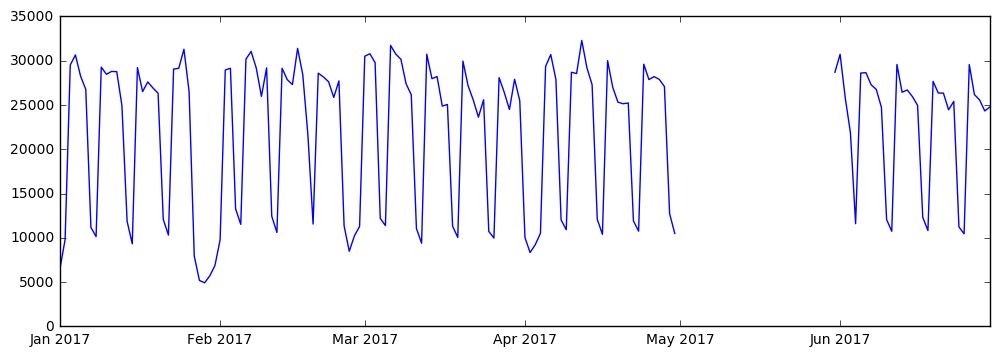

In [13]:
plt.subplots(figsize = (12, 4))
plt.plot(df_m["ds"], df_m["y"])
plt.show()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


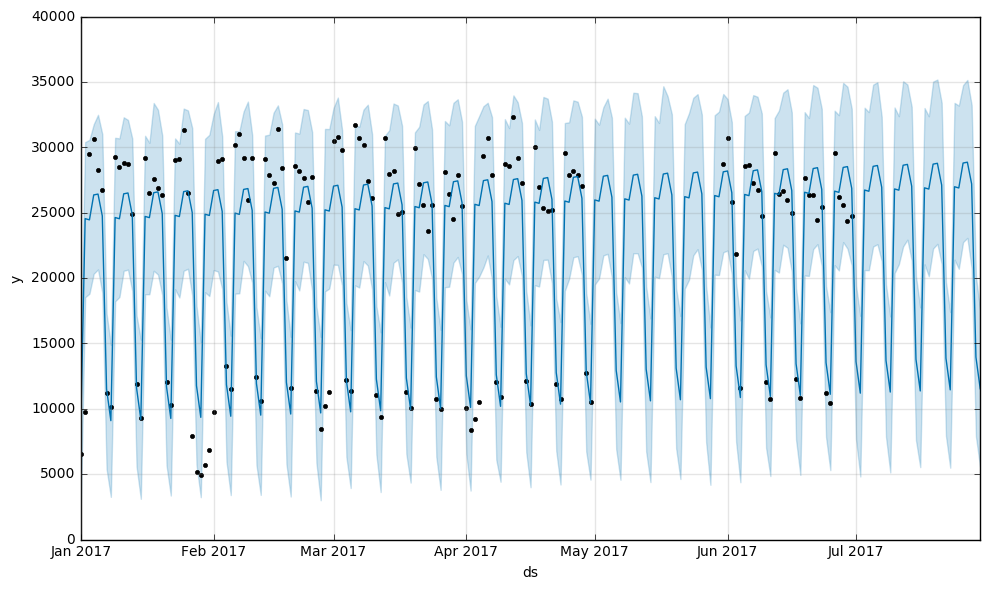

In [14]:
model_m = Prophet()
model_m.fit(df_m)
future_m = model_m.make_future_dataframe(periods = 30)
predict_m = model_m.predict(future_m)
model_m.plot(predict_m)